In [1]:
# Packages
%matplotlib inline
import numpy as np
from numba import jit
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter, IndexLocator

In [2]:
# Latent feature images
image1 = np.array([0,0,0,0,0,0,
                   0,0,0,0,0,0,
                   0,0,0,0,0,0,
                   0,1,0,0,0,0,
                   1,1,1,0,0,0,
                   0,1,0,0,0,0]).reshape(6,6)

image2 = np.array([0,0,0,0,0,0,
                   0,0,0,0,0,0,
                   0,0,0,0,0,0,
                   0,0,0,1,1,1,
                   0,0,0,1,0,1,
                   0,0,0,1,1,1]).reshape(6,6)

image3 = np.array([1,1,1,0,0,0,
                   1,1,0,0,0,0,
                   1,0,0,0,0,0,
                   0,0,0,0,0,0,
                   0,0,0,0,0,0,
                   0,0,0,0,0,0]).reshape(6,6)


image4 = np.array([0,0,0,0,1,0,
                   0,0,0,0,1,0,
                   0,0,0,1,1,1,
                   0,0,0,0,0,0,
                   0,0,0,0,0,0,
                   0,0,0,0,0,0]).reshape(6,6)

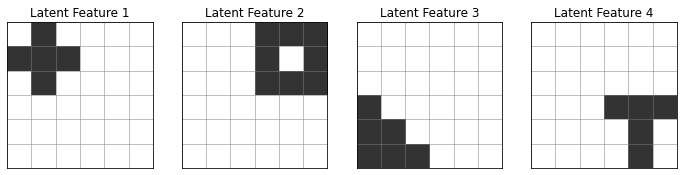

In [3]:
# Display latent feature images
fig, ax = plt.subplots(1, 4, figsize=(12,3))
ims = [image1, image2, image3, image4]
for i in range(len(ims)):
    ax[i].imshow(ims[i], origin = "lower", interpolation = "none", cmap = "Greys", aspect = 1, alpha = 0.8)
    ax[i].set_title("Latent Feature {0}".format(i+1))
    ax[i].grid(True, which="major", color="grey", linewidth=0.5)
    ax[i].xaxis.set_major_locator(IndexLocator(1, 0))
    ax[i].yaxis.set_major_locator(IndexLocator(1, 0))
    ax[i].xaxis.set_major_formatter( NullFormatter() )
    ax[i].yaxis.set_major_formatter( NullFormatter() )
    ax[i].xaxis.set_ticks_position("none")
    ax[i].yaxis.set_ticks_position("none")
plt.savefig("latent_features", bbox_inches="tight")

In [4]:
# Image parameters (pg. 18 of short paper)
N = 100
D = 36
S = 6
K = 4
sx = 0.5

In [5]:
# Set up matrices for generated images
np.random.seed(0)

# Matrix describing inclusion of each feature (50% for each feature)
features = stats.bernoulli.rvs(0.5, size = (N,K))

# Original images with no noise
no_error_images = np.zeros((N,S,S))

# Noise matrix
noise = stats.norm.rvs(loc = 0, scale = sx, size = (N,S,S))

# Final output matrix
data = np.zeros((N,S,S))

In [6]:
# Generate images
for i in range(N):
    
    # Clean images
    for j in range(K):
        no_error_images[i,:,:] += features[i,j]*ims[j]
    
    # Noisy images
    data[i,:,:] = no_error_images[i,:,:] + noise[i,:,:]

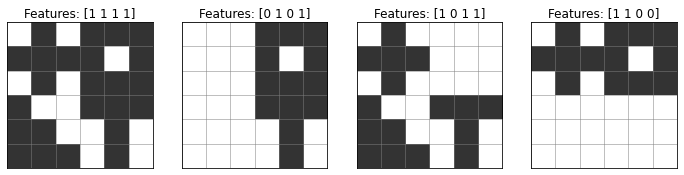

In [7]:
# Display generated images (no noise)
fig, ax = plt.subplots(1, 4, figsize=(12,3))
ims = no_error_images[:4]
for i in range(len(ims)):
    ax[i].imshow(ims[i], origin = "lower", interpolation = "none", cmap = "Greys", aspect = 1, alpha = 0.8)
    ax[i].set_title("Features: {0}".format(features[i]))
    ax[i].grid(True, which="major", color="grey", linewidth=0.5)
    ax[i].xaxis.set_major_locator(IndexLocator(1, 0))
    ax[i].yaxis.set_major_locator(IndexLocator(1, 0))
    ax[i].xaxis.set_major_formatter( NullFormatter() )
    ax[i].yaxis.set_major_formatter( NullFormatter() )
    ax[i].xaxis.set_ticks_position("none")
    ax[i].yaxis.set_ticks_position("none")
plt.savefig("example_data", bbox_inches="tight")

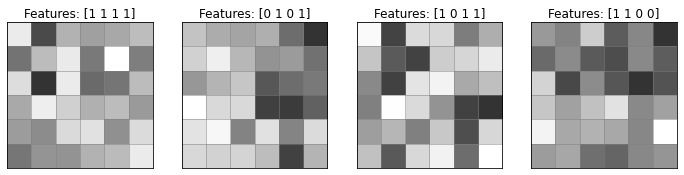

In [8]:
# Display generated images
fig, ax = plt.subplots(1, 4, figsize=(12,3))
ims = data[:4]
for i in range(len(ims)):
    ax[i].imshow(ims[i], origin = "lower", interpolation = "none", cmap = "Greys", aspect = 1, alpha = 0.8)
    ax[i].set_title("Features: {0}".format(features[i]))
    ax[i].grid(True, which="major", color="grey", linewidth=0.5)
    ax[i].xaxis.set_major_locator(IndexLocator(1, 0))
    ax[i].yaxis.set_major_locator(IndexLocator(1, 0))
    ax[i].xaxis.set_major_formatter( NullFormatter() )
    ax[i].yaxis.set_major_formatter( NullFormatter() )
    ax[i].xaxis.set_ticks_position("none")
    ax[i].yaxis.set_ticks_position("none")
plt.savefig("noisy_example_data", bbox_inches="tight")

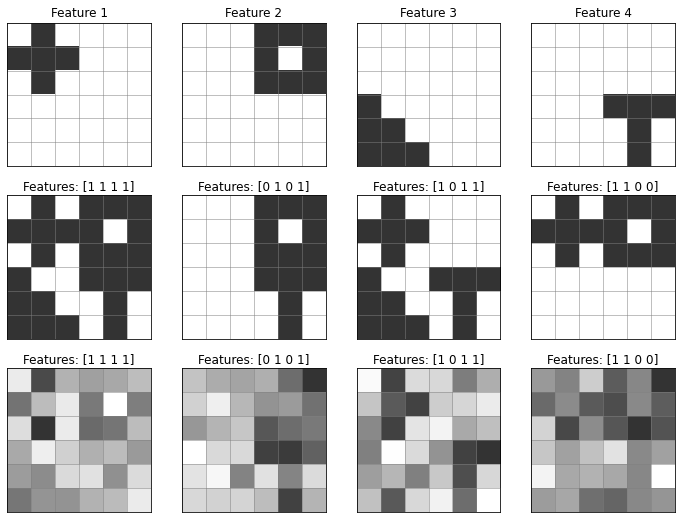

In [9]:
# Lump images into one graph
fig, ax = plt.subplots(3, 4, figsize=(12,9))
ims = [image1, image2, image3, image4]
for i in range(len(ims)):
    ax[0,i].imshow(ims[i], origin = "lower", interpolation = "none", cmap = "Greys", aspect = 1, alpha = 0.8)
    ax[0,i].set_title("Feature {0}".format(i+1))
    ax[0,i].grid(True, which="major", color="grey", linewidth=0.5)
    ax[0,i].xaxis.set_major_locator(IndexLocator(1, 0))
    ax[0,i].yaxis.set_major_locator(IndexLocator(1, 0))
    ax[0,i].xaxis.set_major_formatter( NullFormatter() )
    ax[0,i].yaxis.set_major_formatter( NullFormatter() )
    ax[0,i].xaxis.set_ticks_position("none")
    ax[0,i].yaxis.set_ticks_position("none")

ims = no_error_images[:4]
for i in range(len(ims)):
    ax[1,i].imshow(ims[i], origin = "lower", interpolation = "none", cmap = "Greys", aspect = 1, alpha = 0.8)
    ax[1,i].set_title("Features: {0}".format(features[i]))
    ax[1,i].grid(True, which="major", color="grey", linewidth=0.5)
    ax[1,i].xaxis.set_major_locator(IndexLocator(1, 0))
    ax[1,i].yaxis.set_major_locator(IndexLocator(1, 0))
    ax[1,i].xaxis.set_major_formatter( NullFormatter() )
    ax[1,i].yaxis.set_major_formatter( NullFormatter() )
    ax[1,i].xaxis.set_ticks_position("none")
    ax[1,i].yaxis.set_ticks_position("none")

ims = data[:4]
for i in range(len(ims)):
    ax[2,i].imshow(ims[i], origin = "lower", interpolation = "none", cmap = "Greys", aspect = 1, alpha = 0.8)
    ax[2,i].set_title("Features: {0}".format(features[i]))
    ax[2,i].grid(True, which="major", color="grey", linewidth=0.5)
    ax[2,i].xaxis.set_major_locator(IndexLocator(1, 0))
    ax[2,i].yaxis.set_major_locator(IndexLocator(1, 0))
    ax[2,i].xaxis.set_major_formatter( NullFormatter() )
    ax[2,i].yaxis.set_major_formatter( NullFormatter() )
    ax[2,i].xaxis.set_ticks_position("none")
    ax[2,i].yaxis.set_ticks_position("none")
plt.savefig("example_figure", bbox_inches="tight")

In [10]:
# Function to run one iteration of the IBP
def IBP(customers, alpha):
    
    # Rename inputs
    N = customers
    a = alpha
    
    # Generate first row
    x0 = np.random.poisson(a)
    
    # Create output matrix (rows fully realized)
    xs = np.zeros(shape=(N,x0)).astype(int)
    
    # Set first row of output matrix to 1s from first row
    xs[0,:] = 1
    
    # Generate new row for each customer
    for i in range(2, N+1):
        
        # Sample old dishes
        old_dish_counts = np.sum(xs, axis = 0)
        p = old_dish_counts/i
        xs[i-1,:] = np.random.binomial(1, p, len(p))
        
        # Sample new dishes
        new_dish_count = np.random.poisson(a/i)
        xs = np.concatenate((xs, np.zeros(shape=(N, new_dish_count))), axis = 1)
        xs[i-1, len(p):len(p)+new_dish_count] = 1
    
    # Return final dataframe
    return xs

In [11]:
@jit
# Function to calculate M (cuts down on amount of inversions, see equations 51-54 in the paper)
def calc_M(Z, sX, sA, Kp):
    return np.linalg.inv(Z[:,0:Kp].T @ Z[:,0:Kp] + ((sX/sA)**2) * np.eye(Kp))

In [12]:
@jit
# Log of function from equation 49 in the paper (can use instead of 58 with calc_M)
def log_likelihood(Z, sX, sA, Kp, M, X, D, N):
    d = np.linalg.det((Z.T @ Z + ((sX/sA)**2) * np.eye(Kp)))
    c = N * D * 0.5 * np.log(2*np.pi) + (N-Kp) * D * np.log(sX) + Kp * D * np.log(sA) + D * 0.5 * np.log(d)
    m = np.eye(N) - (Z @ M @ Z.T)
    k = -0.5 * np.reciprocal(sX**2) * np.trace(X.T @ m @ X)
    return (-c + k)

In [13]:
# Model parameters (pg. 19 of short paper)
np.random.seed(0)
N = 100
D = 36
K = 4
sX = 1
sA = 1
alpha = 1
reps = 1000

# Parameter history arrays
Kp_h = np.zeros(reps)
sX_h = np.zeros(reps)
sA_h = np.zeros(reps)
alpha_h = np.zeros(reps)

# Initial IBP matrix
Z = IBP(N, alpha)
Kp = Z.shape[1]

# Harmonic number for updating alpha
xs = np.arange(1,N+1)
H_N = np.sum(1/xs)

# Create flattened data matrix for X
Z0 = np.zeros((N,K))
X = np.zeros((N,D))
ims = [image1, image2, image3, image4]
A = np.array([i.reshape(D) for i in ims])

for i in range(N):
    # Feature assignment matrix with at least one feature
    Z0[i,:] = stats.uniform.rvs(loc = 0, scale = 1, size = K) > 0.5
    while np.sum(Z0[i,:]) == 0:
        Z0[i,:] = stats.uniform.rvs(loc = 0, scale = 1, size = K) > 0.5
        
    # Combine features and noise
    X[i,:] = Z0[i,:] @ A + stats.norm.rvs(loc = 0, scale = sx, size = D)

In [14]:
%%capture --no-display
# MCMC (no-display to ignore Numba warnings about @ operator)
for j in range(reps):
    
    # Update parameter histories
    Kp_h[j] = Kp
    sX_h[j] = sX
    sA_h[j] = sA
    alpha_h[j] = alpha
    
    # Nested loop: Gibbs sampler for Z
    for i in range(N):
        
        # Metropolis updates for row N
        for k in range(Kp):
            
            # Check for k out of bounds, dishes not sampled
            if (k+1) > Kp:
                break
            if np.sum(Z[:,k]) - Z[i,k] <= 0:
                Z[:,k:(Kp-1)] = Z[:,(k+1):Kp]
                Kp -= 1
                continue
            
            # Calculate log likelihood of 0/1
            p = np.zeros(2)
            
            # 0 case
            Z[i,k] = 0
            M = calc_M(Z, sX, sA, Kp)
            p[0] = log_likelihood(Z[:,0:Kp], sX, sA, Kp, M, X, D, N) + np.log(N-np.sum(Z[:,k])) - np.log(N)
            
            # 1 case
            Z[i,k] = 1
            M = calc_M(Z, sX, sA, Kp)
            p[1] = log_likelihood(Z[:,0:Kp], sX, sA, Kp, M, X, D, N) + np.log(np.sum(Z[:,k]) - Z[i,k]) - np.log(N)
            
            # Metropolis assignment
            p = np.exp(p - np.max(p))
            u = stats.uniform.rvs(loc = 0, scale = 1, size = 1)
            if u < p[0] / np.sum(p):
                Z[i,k] = 0
            else:
                Z[i,k] = 1
            
        # Metropolis update for row N new dishes
        p = np.zeros(4)
        Alpha = alpha/N

        # Probabilities for new dishes sampled (truncated at 3) (review Matlab code for this part)
        for kp in range(4):
            if kp > 0:
                ns = np.zeros((N,kp))
                ns[i,:] = 1
                Z = np.concatenate((Z[:,0:Kp], ns), axis = 1)                
            M = calc_M(Z, sX, sA, Kp+kp)
            p[kp] = log_likelihood(Z[:,0:(Kp+kp)], sX, sA, Kp+kp, M, X, D, N)
            p[kp] += kp * np.log(Alpha) - Alpha - np.log(np.math.factorial(kp))
        
        # Normalize probabilities
        Z[i,Kp:(Kp+3)] = 0
        p = np.exp(p - np.max(p))
        p = p / np.sum(p)

        # Assign new dishes (Metropolis for cumulative probability)
        u = stats.uniform.rvs(loc = 0, scale = 1, size = 1)
        cP = 0
        for kp in range(4):
            cP += p[kp]
            if u < cP:
                dishes = kp
                break
        Z[i,Kp:(Kp+dishes)] = 1
        Kp += dishes
    
    # sX/sA Metropolis updates
    M = calc_M(Z, sX, sA, Kp)
    ll = log_likelihood(Z[:,0:Kp], sX, sA, Kp, M, X, D, N)
    
    # sX Metropolis cutoff
    step = stats.uniform.rvs(loc = -0.05, scale = 0.10, size = 1)
    sX_p = sX + step
    M_Xp = calc_M(Z, sX_p, sA, Kp)
    ll_Xp = log_likelihood(Z[:,0:Kp], sX_p, sA, Kp, M_Xp, X, D, N)
    cutoff_X = np.exp(min(0, ll_Xp - ll))
        
    # sA Metropolis cutoff
    step = stats.uniform.rvs(loc = -0.05, scale = 0.10, size = 1)
    sA_p = sA + step
    M_Ap = calc_M(Z, sX, sA_p, Kp)
    ll_Ap = log_likelihood(Z[:,0:Kp], sX, sA_p, Kp, M_Ap, X, D, N)
    cutoff_A = np.exp(min(0, ll_Ap - ll))
    
    # Perform Metropolis updates
    u = stats.uniform.rvs(loc = 0, scale = 1, size = 1)
    if u < cutoff_X:
        sX = sX_p
    u = stats.uniform.rvs(loc = 0, scale = 1, size = 1)
    if u < cutoff_A:
        sA = sA_p
    
    # Update alpha conditional on Z
    alpha = stats.gamma.rvs(a = 1 + Kp, loc = 0, scale = 1/(1 + H_N), size = 1)

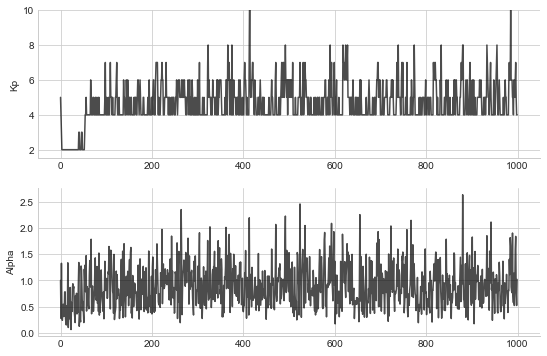

In [15]:
# Plot MCMC results
plt.style.use("seaborn-whitegrid")
data = [Kp_h, alpha_h]
titles = ["Kp", "Alpha"]
fig, ax = plt.subplots(2, 1, figsize=(9,6))
ax[0].set_ylim([1.5,10])
for i in range(len(data)):
    ax[i].set_ylabel(titles[i])
    ax[i].plot(data[i], linewidth = 1.5, alpha = 0.7, color = "k")
    ax[i].spines["top"].set_visible(False)
    ax[i].spines["right"].set_visible(False)
plt.savefig("MCMC", bbox_inches="tight")

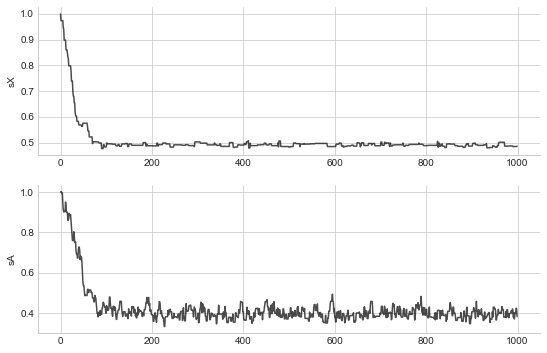

In [16]:
# Plot MCMC results
plt.style.use("seaborn-whitegrid")
data = [sX_h, sA_h]
titles = ["sX", "sA"]
fig, ax = plt.subplots(2, 1, figsize=(9,6))
for i in range(len(data)):
    ax[i].set_ylabel(titles[i])
    ax[i].plot(data[i], linewidth = 1.5, alpha = 0.7, color = "k")
    ax[i].spines["top"].set_visible(False)
    ax[i].spines["right"].set_visible(False)
plt.savefig("MCMC_error", bbox_inches="tight")

In [17]:
# Averages
data = [Kp_h, alpha_h, sX, sA]
titles = ["Kp", "Alpha", "sX", "sA"]
for i in range(len(data)): print("{0} mean:\t{1:f}".format(titles[i], np.mean(data[i])))

Kp mean:	4.675000
Alpha mean:	0.892036
sX mean:	0.486427
sA mean:	0.382486


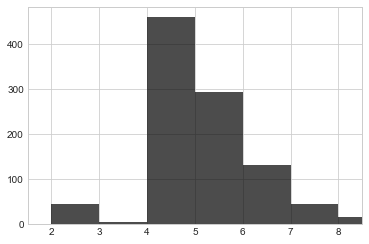

In [18]:
fig, ax = plt.subplots()
plt.hist(Kp_h, alpha = 0.7, color = "k")
plt.xlim(1.5,8.5)
plt.xticks(list(range(2,9)))
plt.savefig("Kphist", bbox_inches="tight")